## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

import warnings

# Игнорировать предупреждения (warnings)
warnings.filterwarnings('ignore')

Прочитаем наш файл с исходными данными:

In [6]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [7]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [8]:
# Преобразуем pickup_datetime в datetime
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# Найдем минимальную и максимальную даты
min_date = taxi_data['pickup_datetime'].min()
max_date = taxi_data['pickup_datetime'].max()

print(f"Минимальная дата: {min_date.date()}")
print(f"Максимальная дата: {max_date.date()}")

Минимальная дата: 2016-01-01
Максимальная дата: 2016-06-30


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [9]:
# Подсчет пропущенных значений по всем столбцам
missing_values = taxi_data.isna().sum().sum()

print(f"Суммарное количество пропущенных значений: {missing_values}")

Суммарное количество пропущенных значений: 0


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [10]:
unique_vendor_count = taxi_data['vendor_id'].nunique()
print(f"Количество уникальных таксопарков: {unique_vendor_count}")

max_passenger_count = taxi_data['passenger_count'].max()
print(f"Максимальное количество пассажиров: {max_passenger_count}")

average_trip_duration = taxi_data['trip_duration'].mean()
median_trip_duration = taxi_data['trip_duration'].median()

print(f"Среднее время поездки: {round(average_trip_duration)} секунд")
print(f"Медианное время поездки: {round(median_trip_duration)} секунд")

min_trip_duration = taxi_data['trip_duration'].min()
max_trip_duration = taxi_data['trip_duration'].max()

print(f"Минимальное время поездки: {min_trip_duration} секунд")
print(f"Максимальное время поездки: {max_trip_duration} секунд")

Количество уникальных таксопарков: 2
Максимальное количество пассажиров: 9
Среднее время поездки: 959 секунд
Медианное время поездки: 662 секунд
Минимальное время поездки: 1 секунд
Максимальное время поездки: 3526282 секунд


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [11]:
def add_datetime_features(data):
    # Добавляем столбцы с датой, часом и днем недели
    data['pickup_date'] = data['pickup_datetime'].dt.date
    data['pickup_hour'] = data['pickup_datetime'].dt.hour
    data['pickup_day_of_week'] = data['pickup_datetime'].dt.strftime('%A')
    
    return data

# Вызываем функцию и передаем в нее исходные данные
taxi_data_with_datetime = add_datetime_features(taxi_data)

# Посчитаем количество поездок в субботу (по дню недели "Saturday")
saturday_trips = taxi_data_with_datetime[taxi_data_with_datetime['pickup_day_of_week'] == 'Saturday'].shape[0]
print(f"Количество поездок в субботу: {saturday_trips}.")

# Посчитаем среднее количество поездок в день
average_trips_per_day = taxi_data_with_datetime['pickup_date'].value_counts().mean()
print(f"Среднее количество поездок в день: {round(average_trips_per_day)}.")

add_datetime_features(taxi_data)

Количество поездок в субботу: 220868.
Среднее количество поездок в день: 8015.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13,Friday
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,7,Sunday
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,6,Friday
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15,Tuesday


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [12]:
holiday_data = pd.read_csv('data/holiday_data.csv.xls', sep=';')
holiday_data.head()

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day


In [13]:
import pandas as pd

# Функция для проверки, является ли дата праздником
def is_holiday(pickup_date, holiday_dates):
    return 1 if pickup_date in holiday_dates else 0

# Функция для добавления признака pickup_holiday
def add_holiday_features(taxi_data, holiday_data):
    # Преобразуем столбец 'date' в формат datetime
    holiday_data['date'] = pd.to_datetime(holiday_data['date'], format='%Y-%m-%d')
    
    # Создаем список дат праздников
    holiday_dates = holiday_data['date'].dt.date.tolist()
    
    # Добавим столбец pickup_holiday, используя метод apply и функцию is_holiday
    taxi_data['pickup_holiday'] = taxi_data['pickup_datetime'].dt.date.apply(lambda x: is_holiday(x, holiday_dates))
    
    # Рассчитаем медианную длительность поездки на такси в праздничные дни
    median_trip_duration_on_holiday = taxi_data[taxi_data['pickup_holiday'] == 1]['trip_duration'].median()
    print(f"Медианная длительность поездки на такси в праздничные дни: {int(median_trip_duration_on_holiday)} секунд.")
    
    return taxi_data

# Вызываем функцию и передаем в нее исходные данные
taxi_data_with_holidays = add_holiday_features(taxi_data.copy(), holiday_data)
add_holiday_features(taxi_data, holiday_data)

Медианная длительность поездки на такси в праздничные дни: 585 секунд.
Медианная длительность поездки на такси в праздничные дни: 585 секунд.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13,Friday,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,7,Sunday,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,6,Friday,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15,Tuesday,0


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [14]:
osrm_data = pd.read_csv('data/osrm_data_train.csv')
osrm_data.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


In [15]:
osrm_data_cleaned = osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
def add_osrm_features(taxi_data, osrm_data):
    # Оставляем только нужные столбцы из osrm_data
    osrm_data = osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
    
    # Объединяем таблицы по столбцу 'id'
    taxi_data = pd.merge(taxi_data, osrm_data, on='id', how='left')
    
    return taxi_data

# Вызываем функцию и передаем в нее исходные данные
taxi_data = add_osrm_features(taxi_data, osrm_data_cleaned)
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

In [16]:
# Рассчитаем медианную длительность поездки в данных
median_trip_duration_in_data = taxi_data['trip_duration'].median()

# Рассчитаем медианную длительность поездки из OSRM
median_trip_duration_from_osrm = taxi_data['total_travel_time'].median()

# Рассчитаем разницу
difference_in_seconds = median_trip_duration_in_data - median_trip_duration_from_osrm

# Округлим разницу до целого числа
difference_in_seconds = round(difference_in_seconds)

print(f"Разница между медианными длительностями поездок: {difference_in_seconds} секунд.")

Разница между медианными длительностями поездок: 372 секунд.


In [17]:
# Подсчитываем количество строк с пропусками
missing_data_count = taxi_data.isnull().sum().tail(3)
missing_data_count

total_distance       1
total_travel_time    1
number_of_steps      1
dtype: int64

In [18]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [19]:
def add_geographical_features(taxi_data):
    # Вычисляем расстояние по формуле гаверсинуса и добавляем в новый столбец
    taxi_data['haversine_distance'] = get_haversine_distance(
        taxi_data['pickup_latitude'],
        taxi_data['pickup_longitude'],
        taxi_data['dropoff_latitude'],
        taxi_data['dropoff_longitude']
    )
    
    # Вычисляем направление и добавляем в новый столбец
    taxi_data['direction'] = get_angle_direction(
        taxi_data['pickup_latitude'],
        taxi_data['pickup_longitude'],
        taxi_data['dropoff_latitude'],
        taxi_data['dropoff_longitude']
    )
    
    return taxi_data

# Применяем функцию к таблице
taxi_data = add_geographical_features(taxi_data)

# Рассчитываем медианное расстояние по формуле гаверсинуса
median_haversine_distance = taxi_data['haversine_distance'].median()

# Округляем до двух знаков после точки-разделителя
median_haversine_distance = round(median_haversine_distance, 2)

print(f"Медианное расстояние по формуле гаверсинуса: {median_haversine_distance} км.")
add_geographical_features(taxi_data)

Медианное расстояние по формуле гаверсинуса: 2.09 км.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday,0,2009.1,164.9,5.0,1.498521,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday,0,2513.2,332.0,6.0,1.805507,-117.153768
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday,0,11060.8,767.6,16.0,6.385098,-159.680165
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday,0,1779.4,235.8,4.0,1.485498,-172.737700
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday,0,1614.9,140.1,5.0,1.188588,179.473585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13,Friday,0,2234.6,311.7,8.0,1.225080,-119.059338
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,7,Sunday,0,7638.0,589.6,11.0,6.049836,25.342196
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,6,Friday,0,9871.5,642.9,10.0,7.824606,-150.788492
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15,Tuesday,0,1628.3,161.6,7.0,1.092564,35.033294


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [20]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

def add_cluster_features(taxi_data, kmeans_model):
    # Получаем географические координаты начала и конца поездок
    coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                        taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
    
    # Предсказываем кластеры для координат с помощью обученной модели
    taxi_data['geo_cluster'] = kmeans_model.predict(coords)
    
    return taxi_data

# Применяем функцию к таблице с данными о поездках
taxi_data = add_cluster_features(taxi_data, kmeans)

# Подсчитываем количество поездок в каждом географическом кластере
cluster_counts = taxi_data['geo_cluster'].value_counts()

# Находим наименьший по размеру географический кластер
smallest_cluster_size = cluster_counts.min()

print(f"Количество поездок в наименьшем по размеру географическом кластере: {smallest_cluster_size}")
add_cluster_features(taxi_data, kmeans)

Количество поездок в наименьшем по размеру географическом кластере: 2


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016-03-14,17,Monday,0,2009.1,164.9,5.0,1.498521,99.970196,9
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016-06-12,0,Sunday,0,2513.2,332.0,6.0,1.805507,-117.153768,4
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2016-01-19,11,Tuesday,0,11060.8,767.6,16.0,6.385098,-159.680165,4
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2016-04-06,19,Wednesday,0,1779.4,235.8,4.0,1.485498,-172.737700,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2016-03-26,13,Saturday,0,1614.9,140.1,5.0,1.188588,179.473585,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,2016-04-08,13,Friday,0,2234.6,311.7,8.0,1.225080,-119.059338,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,2016-01-10,7,Sunday,0,7638.0,589.6,11.0,6.049836,25.342196,9
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,2016-04-22,6,Friday,0,9871.5,642.9,10.0,7.824606,-150.788492,4
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,2016-01-05,15,Tuesday,0,1628.3,161.6,7.0,1.092564,35.033294,0


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [21]:
weather_data = pd.read_csv('data/weather_data.csv')
weather_data.head()

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast,2015-12-31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast,2015-12-31,4
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast,2015-12-31,5
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast,2015-12-31,6


In [22]:
def add_weather_features(df, weather):
    weather['time'] = pd.to_datetime(weather['time'])
    weather['date'] = weather['time'].dt.date
    weather['hour'] = weather['time'].dt.hour
    weather = weather[['date', 'hour', 'temperature', 'visibility', 'wind speed', 'precip', 'events']]
    df = df.merge(
        weather,
        how='left',
        left_on=['pickup_date', 'pickup_hour'],
        right_on=['date', 'hour']
    )
    return df
    
taxi_data = add_weather_features(taxi_data, weather_data)   
taxi_data = taxi_data.drop(['date', 'hour'], axis=1)


print(f'В снежную погоду было совершено {taxi_data[taxi_data["events"]=="Snow"].count()["id"]} поездок.')
print(f'Доля пропусков в столбцах с погодными условиями - {round(taxi_data.isnull().sum()["events"] / taxi_data.shape[0] * 100, 2)}%')

В снежную погоду было совершено 13126 поездок.
Доля пропусков в столбцах с погодными условиями - 0.82%


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [23]:
def fill_null_weather_data(taxi_data):
    # Группируем данные по столбцу 'pickup_date' и рассчитываем медианные значения для каждой группы
    median_temperature = taxi_data.groupby('pickup_date')['temperature'].transform('median')
    median_visibility = taxi_data.groupby('pickup_date')['visibility'].transform('median')
    median_wind_speed = taxi_data.groupby('pickup_date')['wind speed'].transform('median')
    median_precip = taxi_data.groupby('pickup_date')['precip'].transform('median')
    
    # Заполнение пропусков медианными значениями
    taxi_data['temperature'].fillna(median_temperature, inplace=True)
    taxi_data['visibility'].fillna(median_visibility, inplace=True)
    taxi_data['wind speed'].fillna(median_wind_speed, inplace=True)
    taxi_data['precip'].fillna(median_precip, inplace=True)
    
    # Заполнение пропусков в столбцах из taxi_data медианными значениями
    median_total_distance = taxi_data['total_distance'].median()
    median_total_travel_time = taxi_data['total_travel_time'].median()
    median_number_of_steps = taxi_data['number_of_steps'].median()
    
    taxi_data['total_distance'].fillna(median_total_distance, inplace=True)
    taxi_data['total_travel_time'].fillna(median_total_travel_time, inplace=True)
    taxi_data['number_of_steps'].fillna(median_number_of_steps, inplace=True)
    
    return taxi_data

# Вызываем функцию и передаем в нее исходные данные
taxi_data = fill_null_weather_data(taxi_data)

# Рассчитываем медиану в столбце 'temperature' после заполнения пропусков
median_temperature_after_fill = taxi_data['temperature'].median()

# Округляем до десятых
median_temperature_after_fill = round(median_temperature_after_fill, 1)

print(f"Медиана в столбце 'temperature' после заполнения пропусков: {median_temperature_after_fill}")
fill_null_weather_data(taxi_data)

Медиана в столбце 'temperature' после заполнения пропусков: 11.1


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,164.9,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,332.0,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,767.6,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,235.8,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,140.1,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,311.7,8.0,1.225080,-119.059338,0,7.8,16.1,11.1,0.0,None
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,589.6,11.0,6.049836,25.342196,9,7.2,2.8,18.5,8.1,Rain
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,642.9,10.0,7.824606,-150.788492,4,18.3,16.1,0.0,0.0,None
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,161.6,7.0,1.092564,35.033294,0,-2.8,16.1,9.3,0.0,None


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


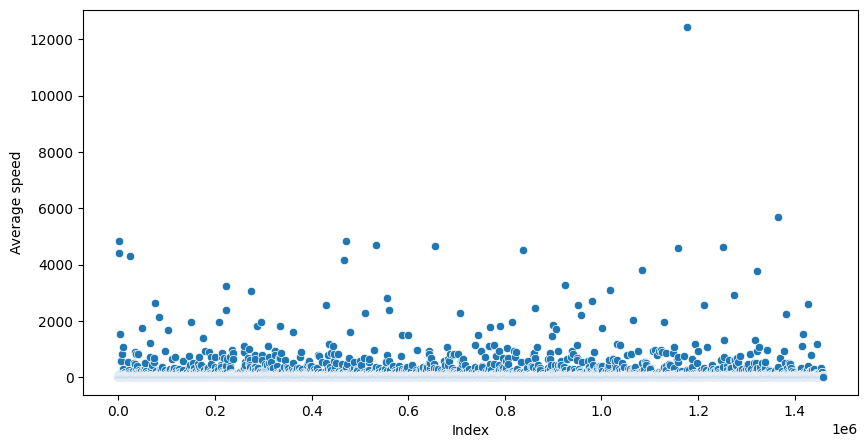

In [24]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [25]:
duration_threshold = 24 * 3600  # Порог для длительности поездки (24 часа в секундах)
speed_threshold = 300  # Порог для скорости (300 км/ч)

# Вычисляем среднюю скорость поездок
taxi_data['avg_speed'] = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6  # переводим длительность из секунд в часы

# Находим и подсчитываем выбросы по длительности поездки и скорости
outliers_duration = taxi_data[taxi_data['trip_duration'] > duration_threshold].shape[0]
outliers_speed = taxi_data[taxi_data['avg_speed'] > speed_threshold].shape[0]

print(f'По длительности поездки нашлось {outliers_duration} выброса.')
print(f'По признаку скорости нашлось {outliers_speed} выбросов.')

# Удаляем выбросы
taxi_data = taxi_data[(taxi_data['trip_duration'] <= duration_threshold) & (taxi_data['avg_speed'] <= speed_threshold)]


По длительности поездки нашлось 4 выброса.
По признаку скорости нашлось 407 выбросов.


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [26]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

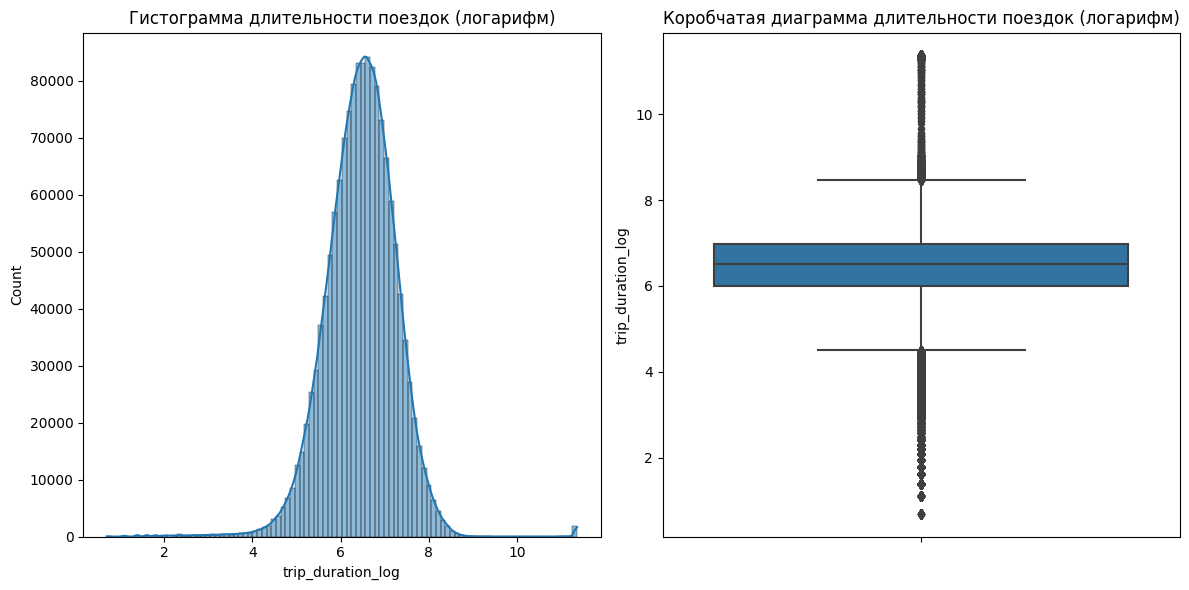

p-value теста Д’Агостино: 0.00
Распределение НЕ является нормальным.


In [27]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Логарифмируем признак trip_duration
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration'] + 1)

# Построим гистограмму
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(taxi_data['trip_duration_log'], bins=100, kde=True)
plt.title('Гистограмма длительности поездок (логарифм)')

# Построим коробчатую диаграмму (boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(y='trip_duration_log', data=taxi_data)
plt.title('Коробчатая диаграмма длительности поездок (логарифм)')

plt.tight_layout()
plt.show()

# Проведем тест Д'Агостино на нормальность распределения
_, p_value = stats.normaltest(taxi_data['trip_duration_log'])

print(f'p-value теста Д’Агостино: {p_value:.2f}')

if p_value < 0.05:
    print('Распределение НЕ является нормальным.')
else:
    print('Распределение является нормальным.')


### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

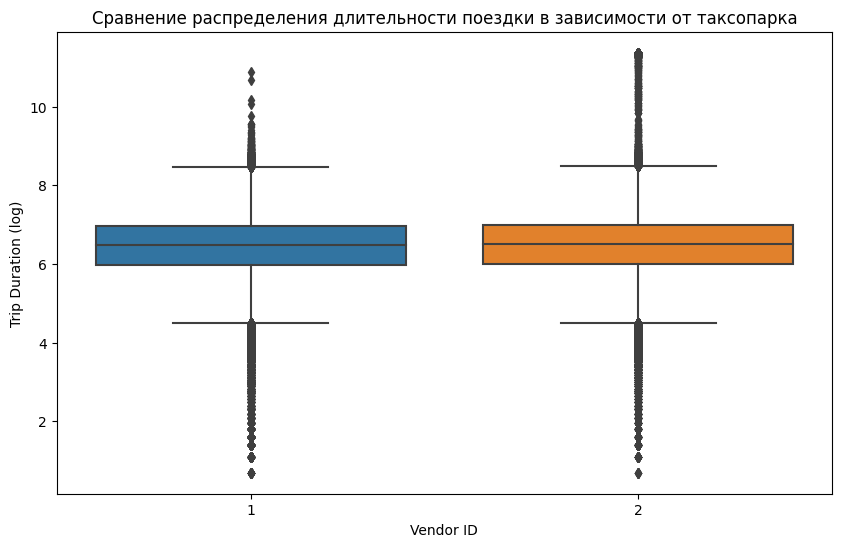

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построим боксплот для сравнения распределений
plt.figure(figsize=(10, 6))
sns.boxplot(x='vendor_id', y='trip_duration_log', data=taxi_data)
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration (log)')
plt.title('Сравнение распределения длительности поездки в зависимости от таксопарка')
plt.show()


### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

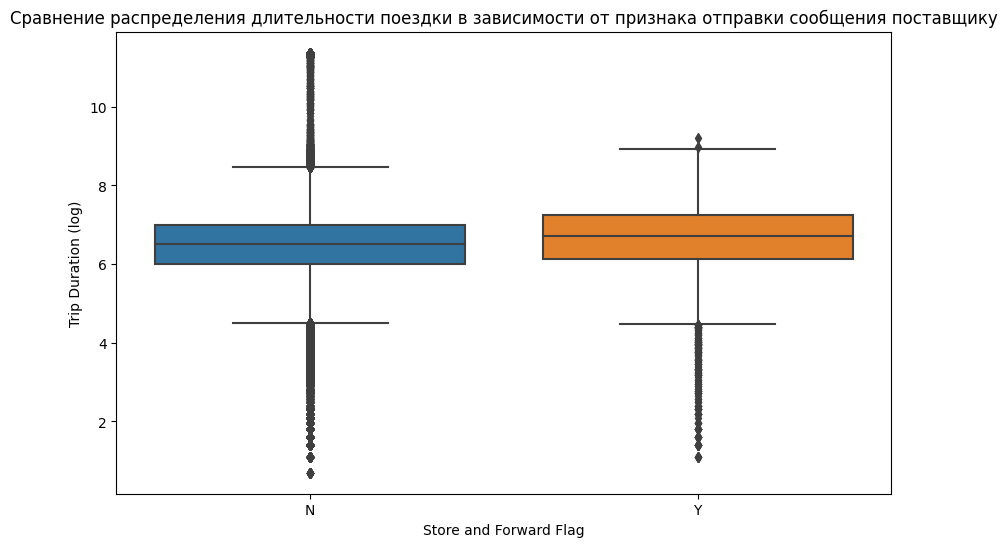

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построим боксплот для сравнения распределений
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_and_fwd_flag', y='trip_duration_log', data=taxi_data)
plt.xlabel('Store and Forward Flag')
plt.ylabel('Trip Duration (log)')
plt.title('Сравнение распределения длительности поездки в зависимости от признака отправки сообщения поставщику')
plt.show()


### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

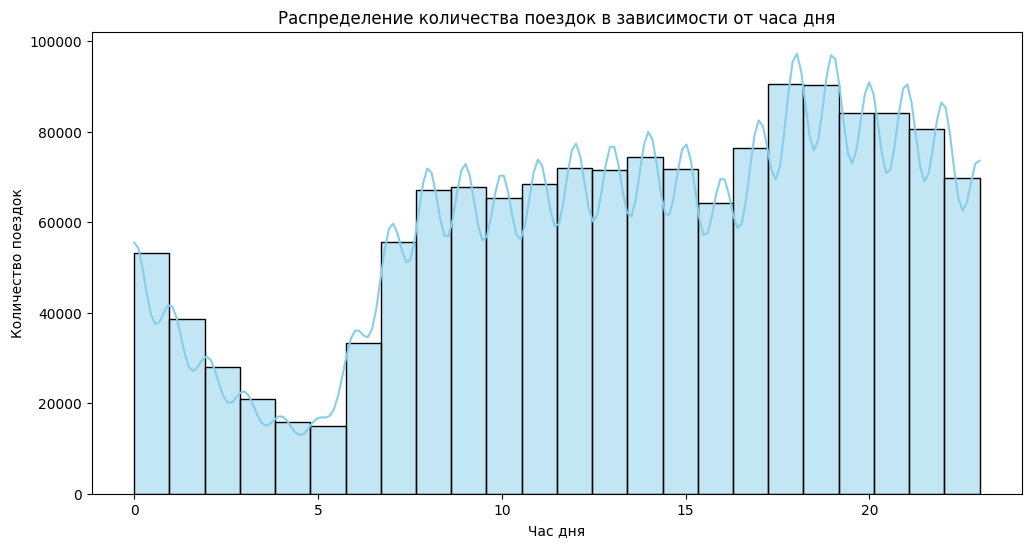

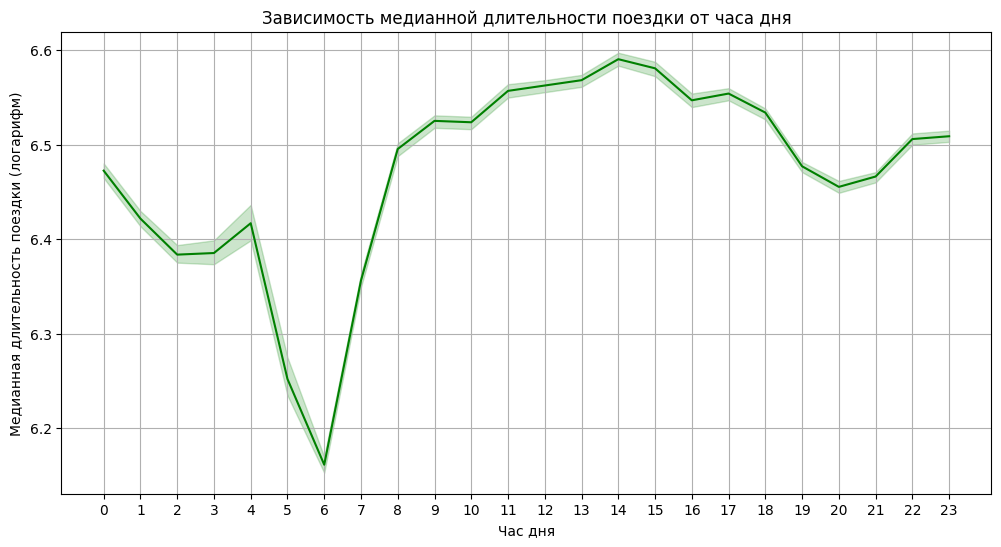

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Распределение количества поездок в зависимости от часа дня
plt.figure(figsize=(12, 6))
sns.histplot(data=taxi_data, x='pickup_hour', bins=24, kde=True, color='skyblue')
plt.xlabel('Час дня')
plt.ylabel('Количество поездок')
plt.title('Распределение количества поездок в зависимости от часа дня')
plt.show()

# Зависимость медианной длительности поездки от часа дня
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='trip_duration_log', data=taxi_data, estimator='median', color='green')
plt.xlabel('Час дня')
plt.ylabel('Медианная длительность поездки (логарифм)')
plt.title('Зависимость медианной длительности поездки от часа дня')
plt.xticks(range(24))
plt.grid(True)
plt.show()




### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


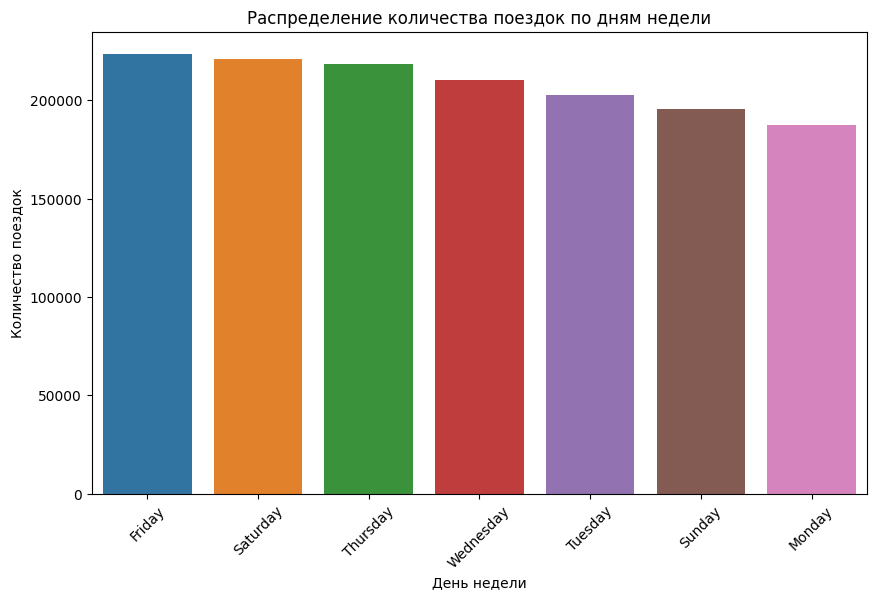

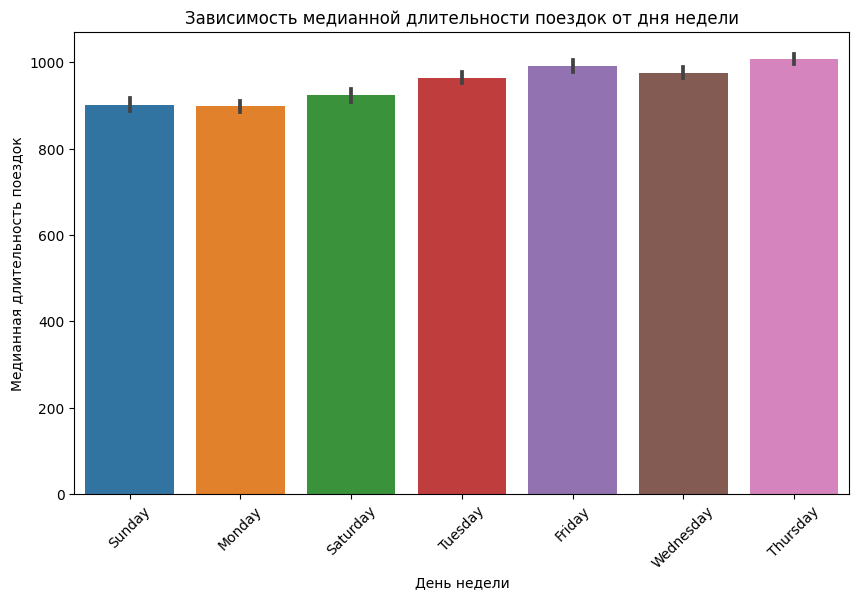

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем копию датасета, чтобы не изменять исходный
data_copy = taxi_data.copy()

# Извлекаем день недели из столбца 'pickup_datetime' и сохраняем его в новый столбец 'pickup_day_of_week'
data_copy['pickup_day_of_week'] = data_copy['pickup_datetime'].dt.day_name()

# Создаем визуализацию распределения количества поездок по дням недели
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_day_of_week', data=data_copy, order=data_copy['pickup_day_of_week'].value_counts().index)
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.title('Распределение количества поездок по дням недели')
plt.xticks(rotation=45)
plt.show()

# Создаем визуализацию зависимости медианной длительности поездок от дня недели
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_day_of_week', y='trip_duration', data=data_copy, order=data_copy.groupby('pickup_day_of_week')['trip_duration'].median().sort_values().index)
plt.xlabel('День недели')
plt.ylabel('Медианная длительность поездок')
plt.title('Зависимость медианной длительности поездок от дня недели')
plt.xticks(rotation=45)
plt.show()


### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

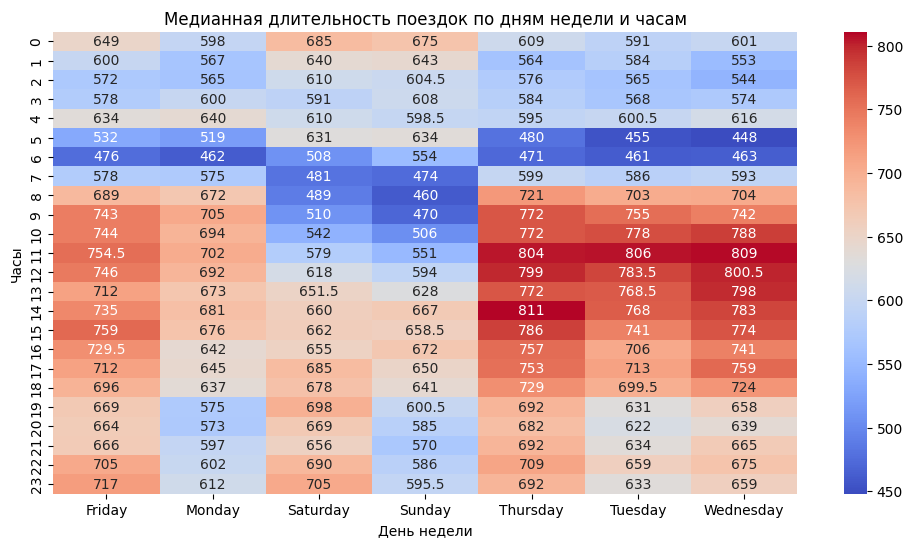

In [32]:
import numpy as np

# Создаем сводную таблицу
pivot_table = taxi_data.pivot_table(index='pickup_hour', columns='pickup_day_of_week', values='trip_duration', aggfunc=np.median)

# Создаем тепловую карту
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='g')
plt.title('Медианная длительность поездок по дням недели и часам')
plt.xlabel('День недели')
plt.ylabel('Часы')
plt.show()


### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


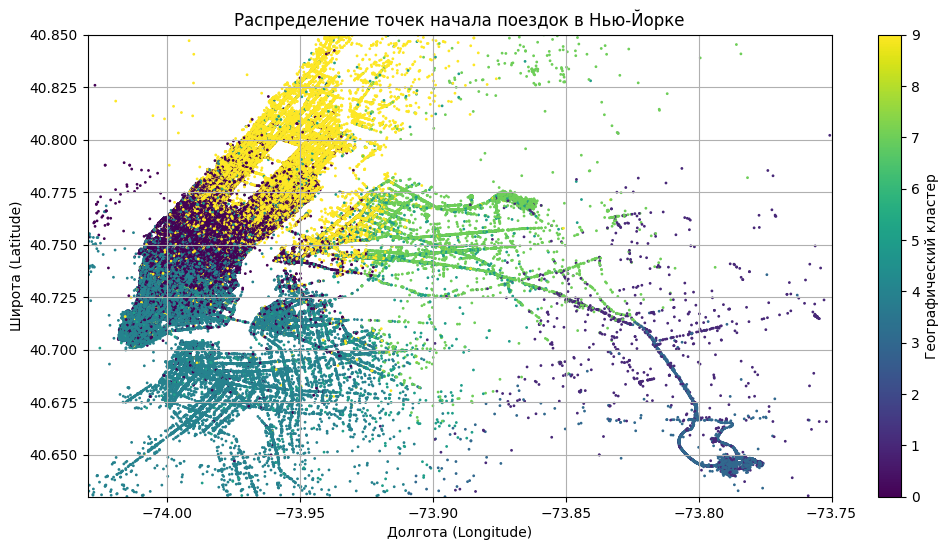

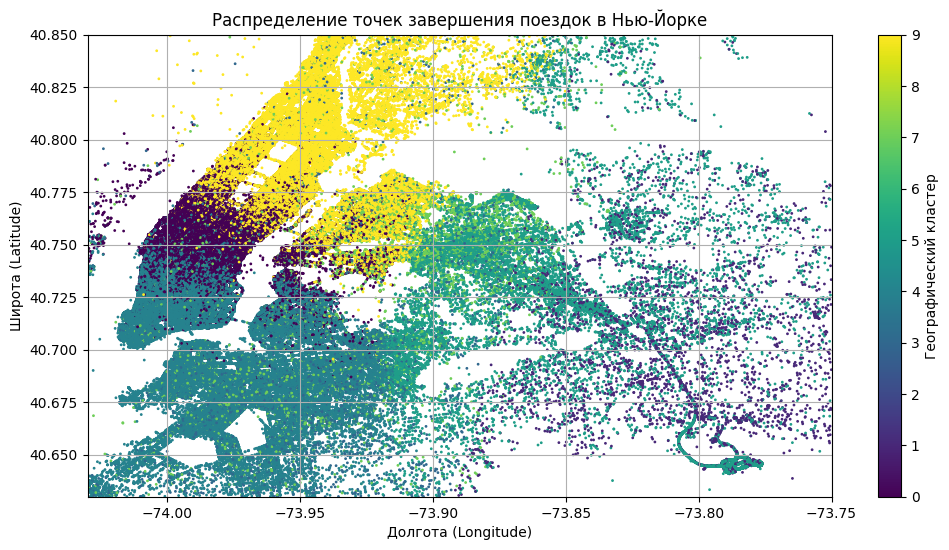

In [33]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Фильтрация данных для точек начала поездок в пределах Нью-Йорка
pickup_points = taxi_data[(taxi_data['pickup_longitude'] >= city_long_border[0]) &
                          (taxi_data['pickup_longitude'] <= city_long_border[1]) &
                          (taxi_data['pickup_latitude'] >= city_lat_border[0]) &
                          (taxi_data['pickup_latitude'] <= city_lat_border[1])]

# Фильтрация данных для точек завершения поездок в пределах Нью-Йорка
dropoff_points = taxi_data[(taxi_data['dropoff_longitude'] >= city_long_border[0]) &
                           (taxi_data['dropoff_longitude'] <= city_long_border[1]) &
                           (taxi_data['dropoff_latitude'] >= city_lat_border[0]) &
                           (taxi_data['dropoff_latitude'] <= city_lat_border[1])]

# Создание scatter-диаграммы для точек начала поездок с окрашиванием по географическим кластерам
plt.figure(figsize=(12, 6))
plt.scatter(pickup_points['pickup_longitude'], pickup_points['pickup_latitude'], c=pickup_points['geo_cluster'], cmap='viridis', s=1)
plt.colorbar(label='Географический кластер')
plt.xlabel('Долгота (Longitude)')
plt.ylabel('Широта (Latitude)')
plt.title('Распределение точек начала поездок в Нью-Йорке')
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.grid(True)
plt.show()

# Создание scatter-диаграммы для точек завершения поездок с окрашиванием по географическим кластерам
plt.figure(figsize=(12, 6))
plt.scatter(dropoff_points['dropoff_longitude'], dropoff_points['dropoff_latitude'], c=dropoff_points['geo_cluster'], cmap='viridis', s=1)
plt.colorbar(label='Географический кластер')
plt.xlabel('Долгота (Longitude)')
plt.ylabel('Широта (Latitude)')
plt.title('Распределение точек завершения поездок в Нью-Йорке')
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.grid(True)
plt.show()


На диаграммах рассеяния видно, что два географических кластера (8 и 2) не представлены на графиках. Это означает, что в выборке отсутствуют данные о поездках, которые начинались и заканчивались за пределами города Нью-Йорк. В этих двух кластерах содержится всего 5 и 2 наблюдения соответственно, что указывает на незначительное количество таких поездок.

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [34]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 28)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'avg_speed', 'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [35]:
train_data = taxi_data.copy()
train_data = train_data.drop('avg_speed', axis=1)
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
train_data.head()

,id,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [36]:
# Удаление признака 'id' и 'dropoff_datetime'
train_data = train_data.drop(['id', 'dropoff_datetime'], axis=1)

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [37]:
drop_columns = ['pickup_datetime', 'pickup_date']
#train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458233 entries, 0 to 1458643
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458233 non-null  int64  
 1   passenger_count     1458233 non-null  int64  
 2   pickup_longitude    1458233 non-null  float64
 3   pickup_latitude     1458233 non-null  float64
 4   dropoff_longitude   1458233 non-null  float64
 5   dropoff_latitude    1458233 non-null  float64
 6   store_and_fwd_flag  1458233 non-null  object 
 7   trip_duration       1458233 non-null  int64  
 8   pickup_hour         1458233 non-null  int64  
 9   pickup_day_of_week  1458233 non-null  object 
 10  pickup_holiday      1458233 non-null  int64  
 11  total_distance      1458233 non-null  float64
 12  total_travel_time   1458233 non-null  float64
 13  number_of_steps     1458233 non-null  float64
 14  haversine_distance  1458233 non-null  float64
 15  direction      

In [39]:
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x==1 else 1)
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x== 'N' else 1)


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [40]:
from sklearn.preprocessing import OneHotEncoder

# Выберите признаки, которые требуется закодировать однократным кодированием
columns_to_change = train_data[['pickup_day_of_week', 'geo_cluster', 'events']]

one_hot_encoder = preprocessing.OneHotEncoder(drop='first')

data = one_hot_encoder.fit_transform(columns_to_change).toarray()
column_names = one_hot_encoder.get_feature_names_out()
data_onehot = pd.DataFrame(data, columns=column_names)


Добавим полученную таблицу с закодированными признаками:

In [41]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 39)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [42]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [43]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [44]:
# Обучите SelectKBest на обучающей выборке
selector = feature_selection.SelectKBest(feature_selection.f_regression, k=25)
selector.fit(X_train, y_train_log)

# Получите индексы отобранных признаков
selected_feature_indices = selector.get_support(indices=True)

# Получите имена отобранных признаков
selected_feature_names = X_train.columns[selected_feature_indices]

# Выведите имена отобранных признаков
print(selected_feature_names)


Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_hour', 'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'temperature',
       'pickup_day_of_week_Monday', 'pickup_day_of_week_Saturday',
       'pickup_day_of_week_Sunday', 'pickup_day_of_week_Thursday',
       'pickup_day_of_week_Tuesday', 'pickup_day_of_week_Wednesday',
       'geo_cluster_1', 'geo_cluster_3', 'geo_cluster_5', 'geo_cluster_7',
       'geo_cluster_9'],
      dtype='object')


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [45]:
from sklearn.preprocessing import MinMaxScaler

# Создаем объект MinMaxScaler
scaler = MinMaxScaler()

# Обучаем нормализатор на обучающей выборке и одновременно применяем его к обучающей выборке
X_train_scal = scaler.fit_transform(X_train)

# Применяем нормализатор к валидационной выборке
X_valid_scal = scaler.transform(X_valid)

# Рассчитываем среднее арифметическое для первого предиктора (первого столбца матрицы) из валидационной выборки
mean_first_predictor_valid = X_valid_scal[:, 0].mean()

# Выводим результат
print(f"Среднее арифметическое для первого предиктора в валидационной выборке: {mean_first_predictor_valid:.2f}")


Среднее арифметическое для первого предиктора в валидационной выборке: 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создаем объект линейной регрессии
model = LinearRegression()

# Обучаем модель на нормализованных тренировочных данных и логарифмированной целевой переменной
model.fit(X_train_scal, y_train_log)

# Предсказываем логарифмированные значения для тренировочной и валидационной выборок
y_train_pred_log = model.predict(X_train_scal)
y_valid_pred_log = model.predict(X_valid_scal)

# Рассчитываем метрику RMSLE на тренировочной и валидационной выборках
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred_log))
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred_log))

# Выводим результаты
print(f"RMSLE на тренировочной выборке: {rmsle_train:}")
print(f"RMSLE на валидационной выборке: {rmsle_valid:}")


RMSLE на тренировочной выборке: 0.5296470961906967
RMSLE на валидационной выборке: 0.5321065993800593


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создайте объект PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# Примените его к нормализованным обучающим и валидационным данным
X_train_poly = poly.fit_transform(X_train_scal)
X_valid_poly = poly.transform(X_valid_scal)

# Создайте и обучите модель линейной регрессии
model_lin_poly = LinearRegression()
model_lin_poly.fit(X_train_poly, y_train_log)

# Получите предсказания для обучающей и валидационной выборок
y_train_pred = model_lin_poly.predict(X_train_poly)
y_valid_pred = model_lin_poly.predict(X_valid_poly)

# Рассчитайте метрику RMSLE
rmsle_train = mean_squared_error(y_train_log, y_train_pred, squared=False)
rmsle_valid = mean_squared_error(y_valid_log, y_valid_pred, squared=False)

# Выведите результаты
print(f'RMSLE на тренировочной выборке: {round(rmsle_train, 2)}')
print(f'RMSLE на валидационной выборке: {round(rmsle_valid, 2)}')



### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
from sklearn.linear_model import Ridge

# Создаем и обучаем модель полиномиальной регрессии с L2-регуляризацией
poly_reg = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_reg.fit_transform(X_train_scal)  # Предполагается, что X_train_scal - нормализованная обучающая выборка
X_valid_poly = poly_reg.transform(X_valid_scal)  # Предполагается, что X_valid_scal - нормализованная валидационная выборка

ridge_reg = Ridge(alpha=1)  # Устанавливаем коэффициент регуляризации alpha равным 1
ridge_reg.fit(X_train_poly, y_train_log)  # Обучаем модель на обучающей выборке

# Получаем предсказания на обучающей и валидационной выборках
y_train_pred = ridge_reg.predict(X_train_poly)
y_valid_pred = ridge_reg.predict(X_valid_poly)

# Рассчитываем метрику RMSLE на обучающей и валидационной выборках
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))

# Выводим результаты
print(f"RMSLE на тренировочной выборке: {rmsle_train:.2f}")
print(f"RMSLE на валидационной выборке: {rmsle_valid:.2f}")


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [47]:
from sklearn.tree import DecisionTreeRegressor

# Создаем и обучаем модель дерева решений
tree_reg = DecisionTreeRegressor(random_state=42)  # Задаем random_state для воспроизводимости результатов
tree_reg.fit(X_train_scal, y_train_log)  # Предполагается, что X_train_scal - нормализованная обучающая выборка

# Получаем предсказания на обучающей и валидационной выборках
y_train_pred = tree_reg.predict(X_train_scal)
y_valid_pred = tree_reg.predict(X_valid_scal)

# Рассчитываем метрику RMSLE на обучающей и валидационной выборках
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))

# Выводим результаты
print(f"RMSLE на тренировочной выборке: {rmsle_train:.2f}")
print(f"RMSLE на валидационной выборке: {rmsle_valid:.2f}")


RMSLE на тренировочной выборке: 0.00
RMSLE на валидационной выборке: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


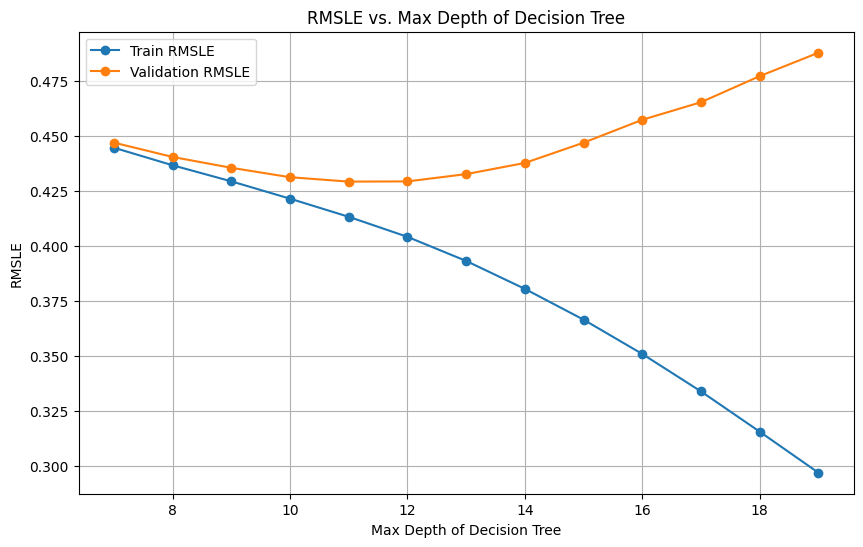

Оптимальная глубина дерева решений: 11
RMSLE на тренировочной выборке для оптимальной глубины: 0.41
RMSLE на валидационной выборке для оптимальной глубины: 0.43


In [48]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Задаем диапазон значений глубины дерева
max_depths = range(7, 20)

# Создаем списки для хранения значений RMSLE на тренировочной и валидационной выборках
rmsle_train_list = []
rmsle_valid_list = []

# Перебираем разные значения глубины дерева
for max_depth in max_depths:
    # Создаем и обучаем модель дерева решений с текущей глубиной
    tree_reg = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree_reg.fit(X_train_scal, y_train_log)
    
    # Получаем предсказания на обучающей и валидационной выборках
    y_train_pred = tree_reg.predict(X_train_scal)
    y_valid_pred = tree_reg.predict(X_valid_scal)
    
    # Рассчитываем метрику RMSLE на обучающей и валидационной выборках
    rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))
    rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))
    
    # Добавляем значения RMSLE в списки
    rmsle_train_list.append(rmsle_train)
    rmsle_valid_list.append(rmsle_valid)

# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(max_depths, rmsle_train_list, label='Train RMSLE', marker='o')
plt.plot(max_depths, rmsle_valid_list, label='Validation RMSLE', marker='o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('RMSLE')
plt.legend()
plt.title('RMSLE vs. Max Depth of Decision Tree')
plt.grid(True)
plt.show()

# Находим оптимальное значение глубины
optimal_depth = max_depths[np.argmin(rmsle_valid_list)]
print(f"Оптимальная глубина дерева решений: {optimal_depth}")

# RMSLE на тренировочной и валидационной выборках для оптимальной глубины
optimal_tree_reg = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
optimal_tree_reg.fit(X_train_scal, y_train_log)
y_train_optimal_pred = optimal_tree_reg.predict(X_train_scal)
y_valid_optimal_pred = optimal_tree_reg.predict(X_valid_scal)
rmsle_train_optimal = np.sqrt(mean_squared_error(y_train_log, y_train_optimal_pred))
rmsle_valid_optimal = np.sqrt(mean_squared_error(y_valid_log, y_valid_optimal_pred))
print(f"RMSLE на тренировочной выборке для оптимальной глубины: {rmsle_train_optimal:.2f}")
print(f"RMSLE на валидационной выборке для оптимальной глубины: {rmsle_valid_optimal:.2f}")


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [49]:
from sklearn.ensemble import RandomForestRegressor

# Задаем гиперпараметры
n_estimators = 200
max_depth = 12
criterion = 'squared_error'
min_samples_split = 20
random_state = 42

# Создаем модель случайного леса
rf_reg = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    criterion=criterion,
    min_samples_split=min_samples_split,
    random_state=random_state,
    verbose=True
)

# Обучаем модель на обучающей выборке
rf_reg.fit(X_train_scal, y_train_log)

# Получаем предсказания на обучающей и валидационной выборках
y_train_rf_pred = rf_reg.predict(X_train_scal)
y_valid_rf_pred = rf_reg.predict(X_valid_scal)

# Рассчитываем метрику RMSLE на тренировочной и валидационной выборках
rmsle_train_rf = np.sqrt(mean_squared_error(y_train_log, y_train_rf_pred))
rmsle_valid_rf = np.sqrt(mean_squared_error(y_valid_log, y_valid_rf_pred))

# Выводим результаты
print(f"RMSLE на тренировочной выборке: {rmsle_train_rf:.2f}")
print(f"RMSLE на валидационной выборке: {rmsle_valid_rf:.2f}")


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 22.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   17.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSLE на тренировочной выборке: 0.40
RMSLE на валидационной выборке: 0.41


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.6s finished


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [50]:
from sklearn.ensemble import GradientBoostingRegressor

# Задаем гиперпараметры
learning_rate = 0.5
n_estimators = 100
max_depth = 6
min_samples_split = 30
random_state = 42

# Создаем модель градиентного бустинга
gb_reg = GradientBoostingRegressor(
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    random_state=random_state
)

# Обучаем модель на обучающей выборке
gb_reg.fit(X_train_scal, y_train_log)

# Получаем предсказания на обучающей и валидационной выборках
y_train_gb_pred = gb_reg.predict(X_train_scal)
y_valid_gb_pred = gb_reg.predict(X_valid_scal)

# Рассчитываем метрику RMSLE на тренировочной и валидационной выборках
rmsle_train_gb = np.sqrt(mean_squared_error(y_train_log, y_train_gb_pred))
rmsle_valid_gb = np.sqrt(mean_squared_error(y_valid_log, y_valid_gb_pred))

# Выводим результаты
print(f"RMSLE на тренировочной выборке: {rmsle_train_gb:.2f}")
print(f"RMSLE на валидационной выборке: {rmsle_valid_gb:.2f}")


RMSLE на тренировочной выборке: 0.37
RMSLE на валидационной выборке: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


Наилучший результат (наименьшее значение RMSLE на валидационной выборке) показала модель Градиентного бустинга над деревьями решений.

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


In [56]:
gb_feat = pd.DataFrame([gb_reg.feature_importances_], columns=X_train.columns)
fig = px.bar(x = list(gb_feat.loc[0].sort_values(ascending=False)[0:3].index),
    y=round(gb_feat.loc[0].sort_values(ascending=False)[0:3], 2),
    text_auto=True,
    title='ТОП-3 фактора'    
)
fig.show()

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [88]:
y_valid = np.exp(y_valid_log) - 1
y_test_pred_conv = np.exp(y_valid_gb_pred) - 1

print(f'MeAE for valid = {round(metrics.median_absolute_error(y_valid, y_test_pred_conv) / 60, 1)}.')


MeAE for valid = 1.8.


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [94]:
test_data = pd.read_csv("data/test_data.csv")
osrm_data_test = pd.read_csv("data/osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [100]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data (test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)

KeyError: 'trip_duration'

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost

После чего модуль можно импортировать:

In [ ]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)